### Problem 6: Quantum Feature Encoding
The task is to encode classical data (e.g., a numerical feature) into a quantum state.

For simplicity, we’ll start with encoding a single feature into a single qubit using amplitude encoding and angle encoding.


#### Why Feature Encoding Matters?
Quantum algorithms require input data to be in a quantum state. The way we encode classical data directly affects the performance and interpretability of quantum AI models.

- **Amplitude Encoding:** Maps data to the amplitudes of a quantum state. Efficient but requires normalization.
- **Angle Encoding:** Encodes data as rotation angles (using gates like 𝑅x,𝑅y,𝑅z ).


**Scenario:**
You have two data points, x1=0.2, and x=0.8, that need to be encoded into quantum states. You’ll:
1. Encode x1 and x2 using both amplitude and angle encoding.
2. Visualize the encoded states.

**Approach:**
1. Use angle encoding to rotate a qubit’s state proportional to x (using 𝑅y gate).
2. Use amplitude encoding for normalized vectors.
3. Simulate and measure the states.

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.compiler import transpile
from qiskit.visualization import plot_bloch_multivector

In [2]:
# Function for Angle Encoding
def angle_encoding(x):
    qc = QuantumCircuit(1) #Single qubit
    qc.ry(2*x, 0) #Encode data as rotation on the y-axis
    return qc

In [3]:
#Function for Amplitude Encoding
# def amplitude_encoding(data):
#     #Normalise the data to use as amplitudes
#     norm = sum([val**2 for val in data])**0.5
#     normalised_data = [val/norm for val in data]
#     qc = QuantumCircuit(len(normalised_data)) #One qubit per feature
#     qc.initialize(normalised_data, list(range(len(normalised_data))))
#     return qc


"""
- When amplitude encoding is used, the number of qubits required is determined by the length of the data vector.
- A vector with n elements requires log2(n) qubits to represent.
- For the given vector [x1,x2]=[0.2,0.8], 
    you need only 1 qubit, as it can represent 2 states (2^1=2).
"""
def amplitude_encoding(data):
    from math import log2, ceil
    #Normalise the data
    norm = sum([val**2 for val in data])**0.5
    normalised_data = [val / norm for val in data ]

    #Calcultate the number of qubits required
    num_qubits = ceil(log2(len(normalised_data)))

    qc = QuantumCircuit(num_qubits) #Create the quantum circuit
    qc.initialize(normalised_data, list(range(num_qubits))) #Initialise with normalise data
    return qc

In [4]:
#Test with 2 data points
x1 = 0.2
x2 = 0.8

In [5]:
#Angle Encoding
qc_anglex1 = angle_encoding(x1)
qc_anglex2 = angle_encoding(x2)

In [6]:
#Simulate and visulaise Angle Encoding
simulator = Aer.get_backend('statevector_simulator')
transpiled_circuit_x1 = transpile(qc_anglex1, simulator)
transpiled_circuit_x2 = transpile(qc_anglex2, simulator)

job_x1 = simulator.run(transpiled_circuit_x1, shots=1000)
job_x2 = simulator.run(transpiled_circuit_x2, shots=1000)

state_x1 = job_x1.result().get_statevector()
state_x2 = job_x2.result().get_statevector()

print("Angle Encoding Results:")
print(f"State for x1={x1}: {state_x1}")
print(f"State for x2={x2}: {state_x2}")

Angle Encoding Results:
State for x1=0.2: Statevector([0.98006658+0.j, 0.19866933+0.j],
            dims=(2,))
State for x2=0.8: Statevector([0.69670671+0.j, 0.71735609+0.j],
            dims=(2,))


In [7]:
# Amplitude Encoding
qc_amplitude = amplitude_encoding([x1, x2])

In [8]:
state_amplitude = (simulator.run(transpile(qc_amplitude, simulator))).result().get_statevector()
print("\nAmplitude Encoding Results:")
print("Encoded State:", state_amplitude)


Amplitude Encoding Results:
Encoded State: Statevector([0.24253563+0.j, 0.9701425 +0.j],
            dims=(2,))


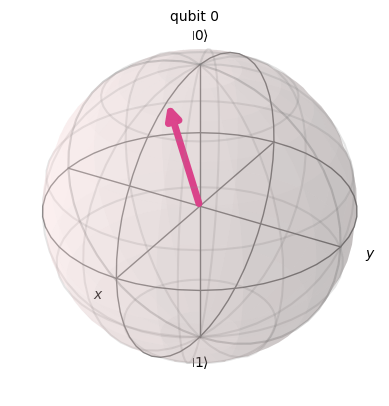

In [9]:
# Visualization on Bloch Sphere
# x1 = 0.2
plot_bloch_multivector(state_x1)

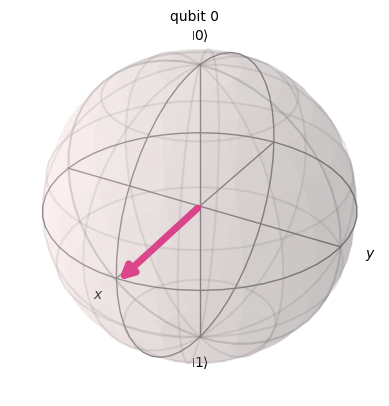

In [10]:
# x2 = 0.8
plot_bloch_multivector(state_x2)

#### OUTCOME:
1. Angle Encoding:
    - Rotatess the qubit state by 2x radians around the Y-axis
    - x1=0.2 results in a small rotation.
    - x2=0.8 results in a larger rotation

2. Amplitude Encoding:
    - Encodes normalised data as amplitudes
    - Resulting state vector represents [0.2,0.8] normalised.

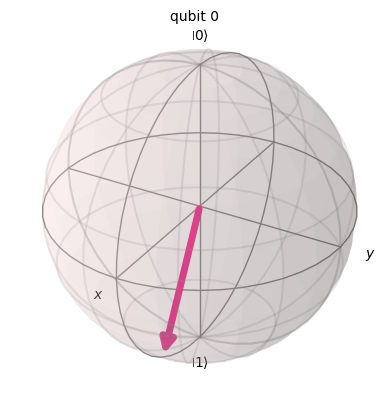

In [11]:
#Amplitude Encoded
plot_bloch_multivector(state_amplitude)